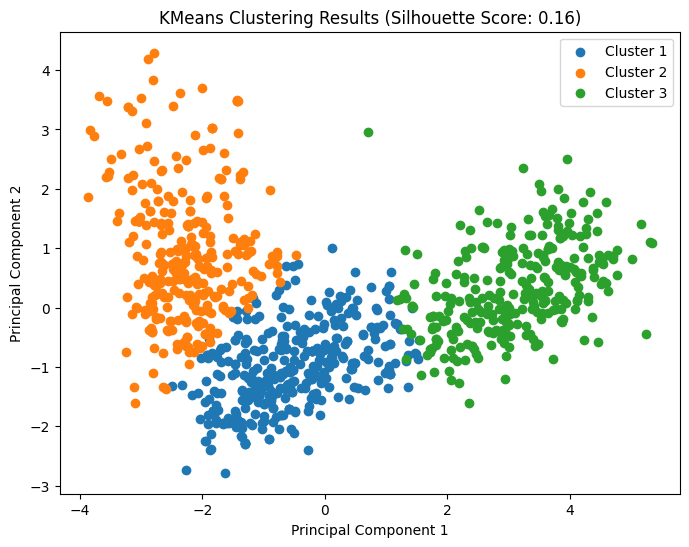

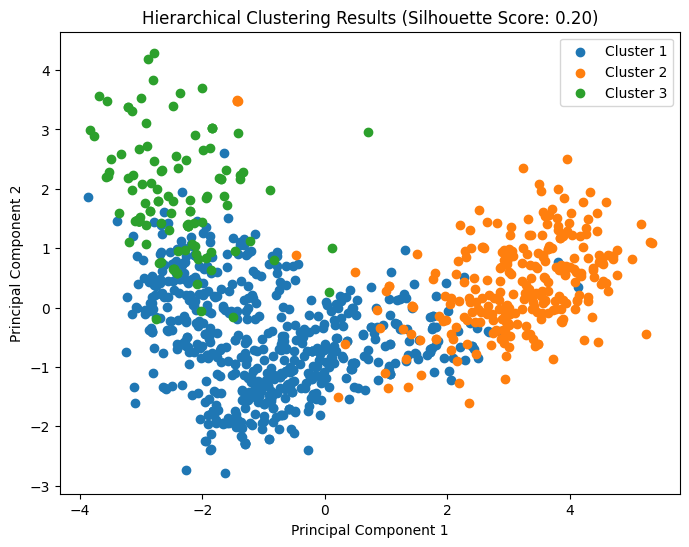

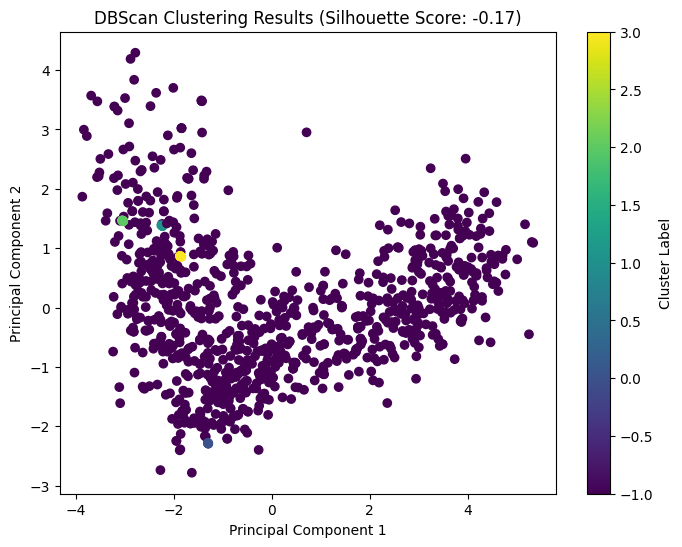

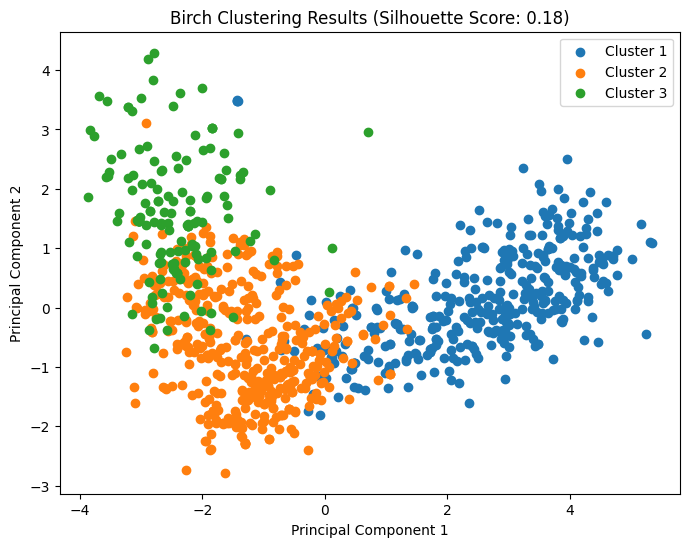

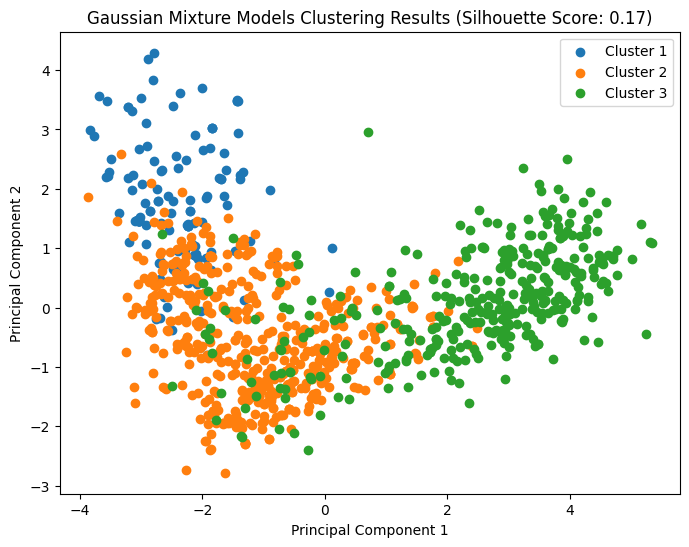

Best clustering method: Hierarchical with parameters linkage=ward_n_clusters=3
Silhouette score: 0.2037679834865618
Best Clustering Result:
         Method                 Parameters  Silhouette Score  \
0  Hierarchical  linkage=ward_n_clusters=3          0.203768   

                                   Model  
0  AgglomerativeClustering(n_clusters=3)  


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv("FilteredSpotData.csv")

# Filter data to include only the chosen genres
chosen_genres = ["hip-hop", "country", "classical"]
filtered_data = data[data['track_genre'].isin(chosen_genres)]

# Drop unnecessary columns
filtered_data.drop(columns=["X", "track_id", "artists", "album_name", "track_name", "track_genre"], inplace=True)

# Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Clustering Analysis
best_cluster_results = []

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
best_cluster_results.append(("KMeans", "n_clusters=3", silhouette_avg, kmeans))

# Visualize clusters using PCA for K-means
plt.figure(figsize=(8, 6))
for i in range(kmeans.n_clusters):
    plt.scatter(pca_data[cluster_labels == i, 0], pca_data[cluster_labels == i, 1], label=f'Cluster {i+1}')
plt.title(f'KMeans Clustering Results (Silhouette Score: {silhouette_avg:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Hierarchical clustering
hier_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = hier_clustering.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
best_cluster_results.append(("Hierarchical", "linkage=ward_n_clusters=3", silhouette_avg, hier_clustering))

# Visualize clusters using PCA for hierarchical clustering
plt.figure(figsize=(8, 6))
for i in range(hier_clustering.n_clusters):
    plt.scatter(pca_data[cluster_labels == i, 0], pca_data[cluster_labels == i, 1], label=f'Cluster {i+1}')
plt.title(f'Hierarchical Clustering Results (Silhouette Score: {silhouette_avg:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# DBScan clustering
dbscan = DBSCAN()
cluster_labels = dbscan.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
best_cluster_results.append(("DBScan", "default", silhouette_avg, dbscan))

# Visualize clusters using PCA for DBScan
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title(f'DBScan Clustering Results (Silhouette Score: {silhouette_avg:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Birch clustering
birch = Birch(n_clusters=3)
cluster_labels = birch.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
best_cluster_results.append(("Birch", "n_clusters=3", silhouette_avg, birch))

# Visualize clusters using PCA for Birch
plt.figure(figsize=(8, 6))
for i in range(len(set(cluster_labels))):
    plt.scatter(pca_data[cluster_labels == i, 0], pca_data[cluster_labels == i, 1], label=f'Cluster {i+1}')
plt.title(f'Birch Clustering Results (Silhouette Score: {silhouette_avg:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Gaussian Mixture Models
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(scaled_data)
cluster_labels = gmm.predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
best_cluster_results.append(("GMM", "covariance_type=full_n_components=3", silhouette_avg, gmm))

# Visualize clusters using PCA for GMM
plt.figure(figsize=(8, 6))
for i in range(gmm.n_components):
    plt.scatter(pca_data[cluster_labels == i, 0], pca_data[cluster_labels == i, 1], label=f'Cluster {i+1}')
plt.title(f'Gaussian Mixture Models Clustering Results (Silhouette Score: {silhouette_avg:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Find the best clustering result based on silhouette score
best_cluster_result = max(best_cluster_results, key=lambda x: x[2])

# Print the best clustering method and its silhouette score
print(f"Best clustering method: {best_cluster_result[0]} with parameters {best_cluster_result[1]}")
print(f"Silhouette score: {best_cluster_result[2]}")

# Store the best result in a dataframe
columns = ['Method', 'Parameters', 'Silhouette Score', 'Model']
best_result_df = pd.DataFrame([best_cluster_result], columns=columns)

# Display the best result
print("Best Clustering Result:")
print(best_result_df)
